In [4]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import xesmf
import cartopy.crs as ccrs

from ufs2arco import sources

In [5]:
gfs = sources.GFSArchive(
    t0={"start": "2015-03-15T00", "end": "2015-03-15T06", "freq": "6h"},
    fhr={"start": 0, "end": 0, "step": 6},
    variables=["orog"],
)
uds = gfs.open_sample_dataset(
    dims={"t0": gfs.t0[0], "fhr": gfs.fhr[0]},
    open_static_vars=True,
    cache_dir=f"./cache/grid-creation",
)
gds = uds.rename({"latitude": "lat", "longitude": "lon"})

In [6]:
gmesh = gds.coarsen(lat=2, lon=2, boundary="trim").mean()

In [7]:
print(gmesh.lon.values[:10])
print(gds.lon.values[:10])

[0.125 0.625 1.125 1.625 2.125 2.625 3.125 3.625 4.125 4.625]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25]


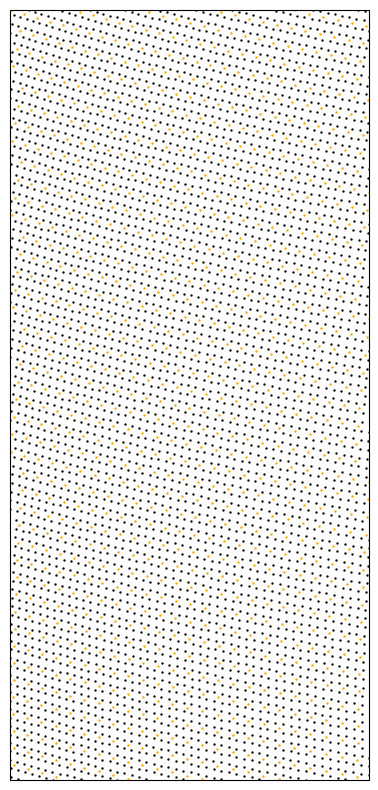

In [9]:
nrows=1
ncols=1
fig, ax = plt.subplots(
    nrows,
    ncols,
    figsize=(ncols*10, nrows*10),
    subplot_kw={"projection": ccrs.Orthographic(central_longitude=-120, central_latitude=20)},
)

for xds, factor, color in zip([gds, gmesh], [10, 5], ["black", "orange"]):
    lon, lat = np.meshgrid(xds.lon, xds.lat)
    #ax.scatter(lon[:factor,:factor], lat[:factor, :factor], c=color)
    ax.scatter(lon, lat, c=color, transform=ccrs.PlateCarree(), s=1/2)
    ax.set_extent([-160, -150, 0, 20], crs=ccrs.PlateCarree())

In [11]:
gmesh.to_netcdf(f"latentx2.fromdata.global_quarter_degree.unsorted.nc")